In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Interest rates

1) <u>Les taux de références</u> 

- taux d'intérêt des obligations gouvernementales (existe jusqu'à 30 ans de maturité)

- taux REPO 

- taux sans risque : sovreign, OIS, Libor 

2) <u>Les taux de références</u> 

Que veut dire 10% sur un placement de 100 au bout d'un an ? Cela c'est pas suffisamment précis, regardons un exemple : 

- composition annuelle : $100 \times (1 + 10\%) = 110$

- composition semi-annuelle : $100 \times (1 + \frac{10\%}{2})^2 = 110.25$

- composition trimestrielle : $100 \times (1 + \frac{10\%}{4})^4 = 110.38$

- composition mensuelle : $100 \times (1 + \frac{10\%}{12})^{12} = 110.47$

- composition journalière : $100 \times (1 + \frac{10\%}{365})^{365} = 110.52$

- composition instantanée : $100 \times e ^{10\%} = 110.52$


<u>**Comment passer de l'un à l'autre ??**</u>

- passer d'un taux instantané à une fréquence m :

On calcule le taux en résolvant avec le log puis on repasse ...

In [6]:
def capital_composé(capital_initial=100, taux_annuel=0.1, fréquence=1, périodes=1):
    if fréquence == 'instant':
        return capital_initial * np.exp(taux_annuel * périodes)
    return capital_initial * (1 + taux_annuel / fréquence) ** (fréquence * périodes)

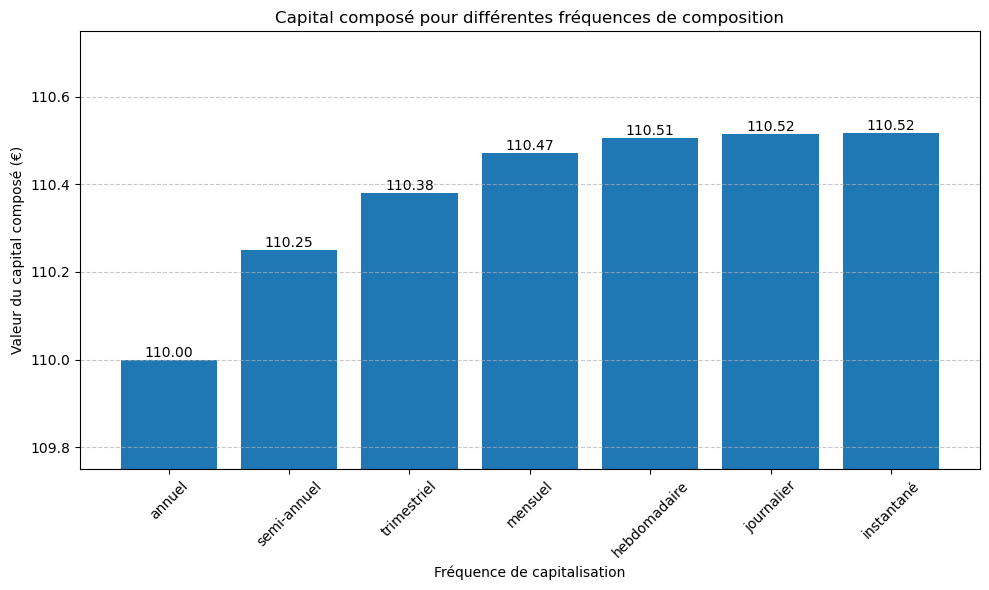

In [29]:
capital_initial = 100 
taux_annuel = 0.1
fréquences = [1, 2, 4, 12, 52, 365, 'instant']
fréquences_label = ['annuel', 'semi-annuel', 'trimestriel', 'mensuel', 'hebdomadaire', 'journalier', 'instantané']
périodes = 1

l = []
for freq in fréquences:
    l.append(capital_composé(capital_initial=capital_initial, taux_annuel=taux_annuel, fréquence=freq, périodes=périodes))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(fréquences_label, l)

for bar, value in zip(bars, l):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom', fontsize=10)


ax.set_ylabel('Valeur du capital composé (€)')
ax.set_xlabel('Fréquence de capitalisation')
ax.set_title('Capital composé pour différentes fréquences de composition')
ax.set_ylim(109.75, 110.75)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

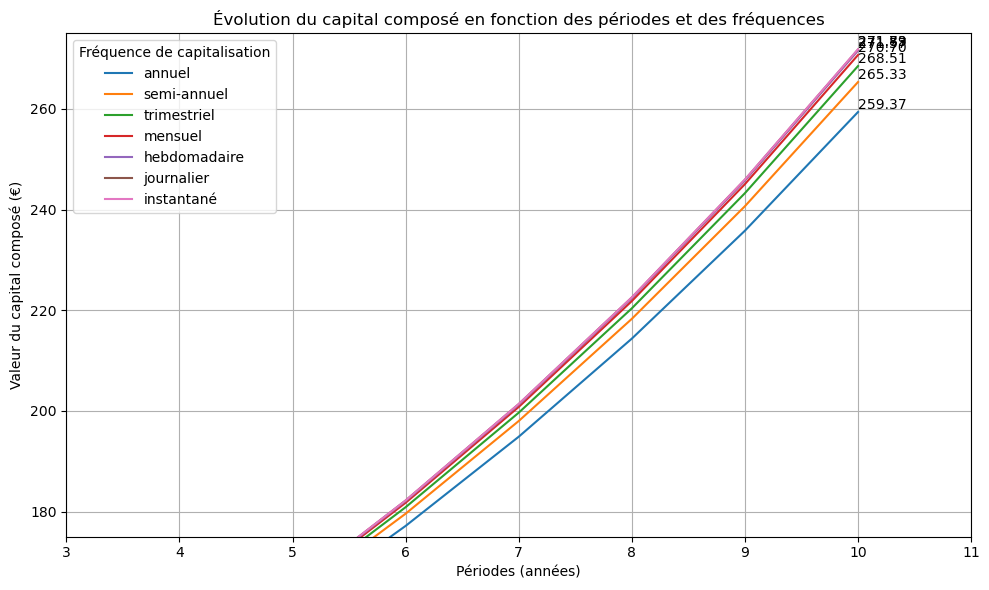

In [72]:
capital_initial = 100
taux_annuel = 0.10
fréquences = [1, 2, 4, 12, 52, 365, 'instant']
fréquences_label = ['annuel', 'semi-annuel', 'trimestriel', 'mensuel', 'hebdomadaire', 'journalier', 'instantané']
périodes = np.arange(11)  

l = []
for freq in fréquences:
    for period in périodes: 
        l.append(capital_composé(capital_initial=capital_initial, taux_annuel=taux_annuel, fréquence=freq, périodes=period))

l = np.array(l).reshape(len(fréquences), len(périodes))
fig, ax = plt.subplots(figsize=(10, 6))

for i, freq_label in enumerate(fréquences_label):
    ax.plot(périodes, l[i], label=freq_label)
    # Ajouter le dernier point de chaque courbe
    ax.text(
        périodes[-1],  # Dernière période (10)
        l[i, -1],      # Dernière valeur pour cette fréquence
        f'{l[i, -1]:.2f}',  # Afficher la valeur avec deux décimales
        fontsize=10,
        color='black',
        ha='left',
        va='bottom'
    )

# Personnalisation des axes et ajout des légendes
ax.set_xlabel('Périodes (années)')
ax.set_ylabel('Valeur du capital composé (€)')
ax.set_title('Évolution du capital composé en fonction des périodes et des fréquences')
ax.legend(title='Fréquence de capitalisation')
ax.grid(True)

ax.set_xlim(3, 11)
ax.set_ylim(175, 275)

# Affichage
plt.tight_layout()
plt.show()

3) <u>Les taux courts</u> 

le taux court sans risque est le tax d'un prêt entre aujourd'hui et demain "overnight". Le prêt à très court terme (sans risque de crédit) est l'actif "risk free" à court terme 

$$dC_t = C_t r_t dt$$

et donc :

$$ C_T = C_0 e^{\int_{0}^{T}r_tdr} $$

En revanche on ne connait pas ;a valeur du placement à long terme, qui dépend de l'évolution de $r_t$

4) <u>Le taux zéro coupon</u> (ZC)

Un ZC est une obligation qui ne verse pas de coupon
On note $B(t, T)$ le prix au temps $t$ d'un ZC qui verse 1 euro à la date $T$ *(prix qui est a priori plus petit que 1)*

Autrement l'achat du ZC coûte $B(t, T)$ en $t$ et rapport 1 euro en $T$ ou encore si on investit 1 euro de ZC en $t$ cela rapporte $\frac{1}{B(t, T)}$ en $T$ *(somme qui est a priori plus grande que 1)*

Si plus généralement si investit une somme $X$ en $t$ on peut acheter $\frac{X}{B(t, T)}$ ZC ce qui nous rapport $1 \times \frac{X}{B(t, T)}$ en $T$

chaque euro investit rapporte $\frac{1}{B(t, T)}$ 

le taux d'intérêt est donc donné par :

$$ e ^ {R_B(t, T)(T - t)} = \frac{1}{B(t, T)}$$

où $(T - t)$ est le nombre d'année restant avant la maturité

Ce taux est appelé taux d'escompte (discount rate) ou encore taux zéro coupon :

$$ B(t, T) = e ^ {-R_B(t, T)(T - t)}$$

$$ R_B(t, T) = - \frac{\log(B(t, T))}{T - t}$$

5) <u>Valorisation à partir de coupons déterministes</u> 

a) <u>à partir des ZC</u> 

on suppose que les ZC sont disponibles pour toutes les maturités
le prix au temps $t$ d'une obligation qui verse $n$ coupons $C_{t_i}$ taux temps $t_i$ est : 

$$ P(t) = \sum_{i=1}^{n} B(t, t_i) C_{t_i} + B(t, T) N $$

c'est un prix d'arbitrage (si par exemple $P(t)$ était plus petit il suffirait s'acheter P(t) et de shorter les ZC ce qui donne un portefeuille qui verse des flux nuls mais qui a une valeur initiale positive) 

En résume2 les ZC permettent de valoriser toutes les obligations ayant des coupons fixes (d'où le nom "discount factor")

b) <u>caractérisation via un taux unique</u> 

<u>**taux actuariel (YTM)**</u> : La formule précédente permet de valoriser une obligation à coupons fixes mais elle **ne donne pas d'idée de combien l'investissement peut rapporter** c'est pourquoi on fait appel au taux actuariel, en anglais *yield to maturity* (YTM), c'est le taux qui annule la valeur nette de l'investissement (prendre la formule pour $P(t)$ et remplacer les taux ZC par un unique taux puis résoudre numériquement). On a d'ailleurs que **le YTM d'un zéro coupon est le taux ZC !!!**

<u>**taux de rendement au pair (par yield)**</u> : Si on connaît le prix des ZC, on peut calculer le taux de coupon $c$ qui rend le prix de l'obligation égal à son nominal :

$$ C_{t_i} = c \times N \times (t_i - t_{i-1})$$ 

On note $\Delta t = (t_i - t_{i-1})$ la fréquence du coupon (supposée fixe). Le prix de l'obligation qui verse de tels coupons est donc : 

$$ P(t) = \sum_{i=1}^{n} B(t, t_i) c N \Delta t + B(t, T) N $$

et donc : 

$$ c = \frac{1 - B(t, T)}{\sum_{i=1}^{n} B(t, t_i)} \frac{1}{\Delta t} $$

exemple : si la fréquence est de 4 coupons par an, $m = \frac{1}{\Delta t} = 4$, on a : 

$$ c_4 = \frac{1 - B(t, T)}{\sum_{i=1}^{n} B(t, t_i)} \times 4 $$

On voit que le taux de rendement au pair dépend : 

i) de la courbe ZC\
ii) de la maturité\
iii) de la fréquence des coupons

In [143]:
## 6) Méthode du Bootstrap pour la détermination des taux ZC 

data = pd.DataFrame({'Principal': [100, 100, 100, 100, 100],
                     'Time to maturity': [0.25, 0.5, 1, 1.5, 2],
                     'Coupon - (semi-annual)': [0, 0, 0, 8, 12], 
                     'Price': [97.5, 94.9, 90, 96, 101.6]})

data

# Pour les ZC c'est simple on fait juste prix / nominal 

# pour les non ZC il faut égaliser la somme des CF discountés avec le prix  
# c'est bien une e2quation a1 une inconnue 
# attention à bien discounter au bon taux (par exemple semi annuel : 
# 1/(1 + r_annuel / 2) ** (2 * 1/2) pour le premier coupon 

,Principal,Time to maturity,Coupon - (semi-annual),Price
0,100,0.25,0,97.5
1,100,0.50,0,94.9
2,100,1.00,0,90.0
3,100,1.50,8,96.0
4,100,2.00,12,101.6


7) <u>Les taux forward</u>  

a) forward rate agreement (FRA) 

Un FRA est un contrat OTC permettant d'assurer qy;un taux d'intérêt fixe $R_K$ sera appliqué entre deux dates pour l'emprunt / placement d'un certain montant (notionnel) 

<u>Définition</u> : à une date $t$, le **taux forward** entre $T_1$ et $T_2$ est le taux d'intérêt qu'il est possible

i) de convenir en $t$ (à l'avance donc)\
ii) pour un coût nul en $t$\
iii) pour un emprunt à la date $T_1$ remboursé en $T_2$

c'est le taux d'intérêt qui rend nulle la valeur du FRA en $t$

Comment répliquer un FRA ? On suppose qu'on peut emprunter sans spread de crédit, sans frais, sans risque de défaut... 
Pour un notionnel $N$ à rembourser en $T_2$ 

- On emprunte au temps $t$ la quantité $N \times B(t, T_2)$ à maturité $T_2$. Il faudra donc rembourser $N$ en $T_2$

- On place en $t$ la quantité $N \times B(t, T_2)$ à maturité $T_1$. En d'autre termes, on achète $N \times \frac{B(t, T_2)}{B(t, T_1)}$ ZC de maturité $T_1$

- Au temps $T_1$ on a donc obtenu $1 \times N \frac{B(t, T_2)}{B(t, T_1)}$ 

On note  $B^{T_1}(t, T_2) = \frac{B(t, T_2)}{B(t, T_1)}$ et on appelle cette quantité la valeur $T_1$ forward du ZC de maturité $T_2$ 

interprétation : prévision d'un taux futur par le marché 

b) valeur d'un FRA

FRA permet d'emprunter à un taux $R_K$ entre $T_1$ et  $T_2$. Cela permet de toucher en $T_1$ : 

$$ N B^K(T_1, T_2) = N e^{-R_K (T_1 - T_2)}$$

- En $T_1$ on touche $N B^K(T_1, T_2)$
- En $T_2$ on rembourse $N$
